# Setting up PySpark in Colab
Spark is written in the Scala programming language and requires the Java Virtual Machine (JVM) to run. Therefore, our first task is to download Java.


In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Next, we will install Apache Spark 3.0.1 with Hadoop 2.7 from here.

In [2]:
!wget https://dlcdn.apache.org/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3.tgz

--2024-10-14 15:27:13--  https://dlcdn.apache.org/spark/spark-3.5.3/spark-3.5.3-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 400864419 (382M) [application/x-gzip]
Saving to: ‘spark-3.5.3-bin-hadoop3.tgz’

spark-3.5.3-bin-had 100%[===================>] 382.29M   201MB/s    in 1.9s    

2024-10-14 15:27:15 (201 MB/s) - ‘spark-3.5.3-bin-hadoop3.tgz’ saved [400864419/400864419]



Now, we just need to unzip that folder.

In [3]:
!tar xf spark-3.5.3-bin-hadoop3.tgz

There is one last thing that we need to install and that is the findspark library. It will locate Spark on the system and import it as a regular library.

In [4]:
!pip install -q findspark

Now that we have installed all the necessary dependencies in Colab, it is time to set the environment path. This will enable us to run Pyspark in the Colab environment.

In [5]:
!ls /content/spark-3.5.3-bin-hadoop3

bin   data	jars	    LICENSE   NOTICE  R		 RELEASE  yarn
conf  examples	kubernetes  licenses  python  README.md  sbin


In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.3-bin-hadoop3"

Time for the real test!

We need to locate Spark in the system. For that, we import findspark and use the findspark.init() method.



In [7]:
import findspark
findspark.init()

Bonus – If you want to know the location where Spark is installed, use findspark.find()


In [8]:
findspark.find()

'/content/spark-3.5.3-bin-hadoop3'

Now, we can import SparkSession from pyspark.sql and create a SparkSession, which is the entry point to Spark.

You can give a name to the session using appName() and add some configurations with config() if you wish.



In [9]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

Finally, print the SparkSession variable.


In [10]:
spark

If you want to view the Spark UI, you would have to include a few more lines of code to create a public URL for the UI page.



In [11]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

--2024-10-14 15:27:40--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.237.133.81, 18.205.222.128, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.237.133.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  56.1MB/s    in 0.2s    

2024-10-14 15:27:40 (56.1 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [12]:
!curl -s http://localhost:4040/api/tunnels

{"tunnels":[],"uri":"/api/tunnels"}


# I. Apache Spark examples

## I.1. Spark DF example

In [13]:
# Create a Spark DF
df = spark.createDataFrame (
    [
        ("sue", 32),
        ("li", 3),
        ("bob", 75),
        ("heo", 13),
    ],
    ["first_name", "age"],
)

df.show()

+----------+---+
|first_name|age|
+----------+---+
|       sue| 32|
|        li|  3|
|       bob| 75|
|       heo| 13|
+----------+---+



In [14]:
# Add a column to a Spark DF
from pyspark.sql.functions import col, when

df1 = df.withColumn(
    "life_stage",
    when(col("age") < 13, "child")
    .when(col("age").between(13, 19), "teenager")
    .otherwise("adult"),
)

df1.show()

+----------+---+----------+
|first_name|age|life_stage|
+----------+---+----------+
|       sue| 32|     adult|
|        li|  3|     child|
|       bob| 75|     adult|
|       heo| 13|  teenager|
+----------+---+----------+



In [15]:
# df is unchanged
df.show()

+----------+---+
|first_name|age|
+----------+---+
|       sue| 32|
|        li|  3|
|       bob| 75|
|       heo| 13|
+----------+---+



In [16]:
# Filter a Spark DF
df1.where(col ("life_stage").isin (["teenager", "adult"])).show()

+----------+---+----------+
|first_name|age|life_stage|
+----------+---+----------+
|       sue| 32|     adult|
|       bob| 75|     adult|
|       heo| 13|  teenager|
+----------+---+----------+



In [17]:
# Group by aggregation on Spark DF
from pyspark.sql.functions import avg

df1.select(avg("age")).show()

+--------+
|avg(age)|
+--------+
|   30.75|
+--------+



In [18]:
# Group by aggregation on Spark DF (continue)

df1.groupBy("life_stage").agg(avg("age")).show()

+----------+--------+
|life_stage|avg(age)|
+----------+--------+
|     adult|    53.5|
|  teenager|    13.0|
|     child|     3.0|
+----------+--------+



In [19]:
# Query the DataFrame with SQL
spark.sql("select avg (age) from {df1}", df1=df1).show()


+--------+
|avg(age)|
+--------+
|   30.75|
+--------+



In [20]:
spark.sql("select life_stage, avg (age) from {df1} group by life_stage", df1=df1).show()

+----------+--------+
|life_stage|avg(age)|
+----------+--------+
|     adult|    53.5|
|  teenager|    13.0|
|     child|     3.0|
+----------+--------+



## I.2. Spark SQL example

In [21]:
df1.write.saveAsTable("some_people")

In [22]:
spark.sql('select * from some_people').show()

+----------+---+----------+
|first_name|age|life_stage|
+----------+---+----------+
|       sue| 32|     adult|
|        li|  3|     child|
|       bob| 75|     adult|
|       heo| 13|  teenager|
+----------+---+----------+



In [23]:
spark.sql("INSERT INTO some_people VALUES ('frank', 4, 'child')")
spark.sql('select * from some_people').show()

+----------+---+----------+
|first_name|age|life_stage|
+----------+---+----------+
|       sue| 32|     adult|
|        li|  3|     child|
|       bob| 75|     adult|
|       heo| 13|  teenager|
|     frank|  4|     child|
+----------+---+----------+



In [24]:
spark.sql('select * from some_people where life_stage="teenager"').show()

+----------+---+----------+
|first_name|age|life_stage|
+----------+---+----------+
|       heo| 13|  teenager|
+----------+---+----------+



## I.3. Spark structured streaming example

In [25]:
# TODO

## I.4. Spark RDD example

In [26]:
text_file = spark.sparkContext.textFile('data/some_text.txt')

In [27]:
counts = (text_file.flatMap(lambda line: line.split(" "))
             .map(lambda word: (word, 1))
             .reduceByKey(lambda a, b: a + b))

In [28]:
counts.collect()

[('these', 2),
 ('are', 2),
 ('words', 3),
 ('more', 1),
 ('in', 1),
 ('english', 1)]

# II. Practice with Spark RDD

## II.1. Create SparkContext object

In [29]:
# Spark Context object
from pyspark import SparkConf, SparkContext

sc = SparkContext.getOrCreate()

## II.2. Create a RDD

In [30]:
iterator = [1, 2, 3, 4, 5]
lines = sc.parallelize(iterator)
lines

ParallelCollectionRDD[57] at readRDDFromFile at PythonRDD.scala:289

In [31]:
lines = sc.textFile("data/some_text.txt")
lines

data/some_text.txt MapPartitionsRDD[59] at textFile at NativeMethodAccessorImpl.java:0

## II.3. RDD Transformations

In [32]:
# map(f)
rdd = sc.parallelize([2, 3, 4])
rdd.map(lambda x: list(range(1, x))).collect()

[[1], [1, 2], [1, 2, 3]]

In [33]:
# flatMap(f)
rdd = sc.parallelize([2, 3, 4, 5])
rdd.flatMap(lambda x: list(range(1, x))).collect()

[1, 1, 2, 1, 2, 3, 1, 2, 3, 4]

In [34]:
# filter(f)
rdd = sc.parallelize(range(10))
rdd.filter(lambda x: x % 2 == 0).collect()

[0, 2, 4, 6, 8]

In [35]:
# distinct()
rdd = sc.parallelize([1, 1, 4, 2, 1, 3, 3])
rdd.distinct().collect()

[1, 4, 2, 3]

In [36]:
# sample()
rdd = sc.parallelize(range(100), 4)
rdd.sample(False, 0.1, 81).collect()

[4, 26, 39, 41, 42, 52, 63, 76, 80, 86, 97]

In [37]:
# union(otherRDD)
rdd1 = sc.parallelize(range(5))
rdd2 = sc.parallelize(range(3, 9))
rdd3 = rdd1.union(rdd2)
rdd3.collect()


[0, 1, 2, 3, 4, 3, 4, 5, 6, 7, 8]

In [38]:
# intersection(otherRDD)
rdd1 = sc.parallelize(range(5))
rdd2 = sc.parallelize(range(3, 9))
rdd3 = rdd1.intersection(rdd2)
rdd3.collect()

[4, 3]

In [39]:
# subtract(otherRDD)
rdd1 = sc.parallelize(range(5))
rdd2 = sc.parallelize(range(3, 9))
rdd3 = rdd1.subtract(rdd2)
rdd3.collect()

[0, 2, 1]

In [40]:
# cartesian(otherRDD)
rdd1 = sc.parallelize([1, 2])
rdd2 = sc.parallelize(["a", "b"])
rdd1.cartesian(rdd2).collect()


[(1, 'a'), (1, 'b'), (2, 'a'), (2, 'b')]

## II.4. RDD Actions

In [41]:
# Get all value
rdd = sc.parallelize([1, 2, 3, 3])
rdd.collect()

[1, 2, 3, 3]

In [42]:
# Number of elements in the RDD
rdd = sc.parallelize([1, 3, 1, 2, 2, 2])
rdd.count()

6

In [43]:
# The count of each unique value in the RDD as a dictionary of {value: count} pairs.
rdd.countByValue()


defaultdict(int, {1: 2, 3: 1, 2: 3})

In [44]:
# Get some values in an RDD
rdd = sc.parallelize([(3, 'a'), (1, 'b'), (2, 'd')])
rdd.takeOrdered(2)

[(1, 'b'), (2, 'd')]

In [45]:
# The reduce action
rdd = sc.parallelize([1, 2, 3])
rdd.reduce(lambda a, b: a + b)

6

In [46]:
rdd.fold(0, lambda a, b: a + b)

6

In [47]:
rdd = sc.parallelize([1, 2, 4], 2) # RDD with 2 partitions
"""
RDD has 2 partition: say [1, 2] and [4]
Sum in the partitions: 2.5 + (1 + 2) = 5.5 and 2.5 + (4) = 6.5
Sum over partitions: 2.5 + (5.5 + 6.5) = 14.5
"""
rdd.fold(2.5, lambda a, b: a + b)

14.5

In [48]:
rdd = sc.parallelize([1, 2, 3], 5) # RDD with 5 partitions
"""
If number of P is more than number of elements
=> Some P is empty
-> [1][2][3][][]
-> 2 + (2 + 1) + (2 + 2) + (2 + 3) + (2 + 0) + (2 + 0) = 18
"""

rdd.fold(2, lambda a, b: a + b)


18

In [49]:
seqOp = lambda acc, x: (acc[0] + x, acc[1] + 1)
combOp = lambda acc1, acc2: (acc1[0] + acc2[0], acc1[1] + acc2[1])
sc.parallelize([1, 2, 3, 4]).aggregate((0, 0), seqOp, combOp)

(10, 4)

acc = (0, 0) => (init sum, init count)
--------------
acc1 = (0, 0) | part1 = [1, 2]

acc1 <> [1] --> (0 + 1, 0 + 1) = (1, 1)

acc1 <> [2] --> (1 + 2, 1 + 1) = (3, 2)

acc2 = (0, 0) | part2 = [3, 4]

acc2 <> [3] --> (0 + 3, 0 + 1) = (3, 1)

acc2 <> [4] --> (3 + 4, 1 + 1) = (7, 2)

==> res = acc1 + acc2 = (3 + 7, 2 + 2) = (10, 4)

In [50]:
# TODO

# III. Practice with Spark DF and SQL

## III.1. Spark DF

In [51]:
from pyspark.sql import Row
row1 = Row(name="John", age=21)
row2 = Row(name="James", age=32)
row3 = Row(name="Jane", age=18)
row1['name']


'John'

In [52]:
df = spark.createDataFrame([row1, row2, row3])
df

DataFrame[name: string, age: bigint]

In [ ]:
df.show()

+-----+---+
| name|age|
+-----+---+
| John| 21|
|James| 32|
| Jane| 18|
+-----+---+



In [54]:
df.printSchema()

root
 |-- name: string (nullable = true)
 |-- age: long (nullable = true)



In [ ]:
df.rdd.getNumPartitions()

1

In [56]:
rows = [
 Row(name="John", age=21, gender="male"),
 Row(name="James", age=25, gender="female"),
 Row(name="Albert", age=46, gender="male")
 ]
df = spark.createDataFrame(rows)
df.show()


+------+---+------+
|  name|age|gender|
+------+---+------+
|  John| 21|  male|
| James| 25|female|
|Albert| 46|  male|
+------+---+------+



In [57]:
column_names = ["name", "age", "gender"]
rows = [
 ["John", 21, "male"],
 ["James", 25, "female"],
 ["Albert", 46, "male"]
 ]
df = spark.createDataFrame(rows, column_names)
df.show()


+------+---+------+
|  name|age|gender|
+------+---+------+
|  John| 21|  male|
| James| 25|female|
|Albert| 46|  male|
+------+---+------+



In [58]:
column_names = ["name", "age", "gender"]
rdd = sc.parallelize([
 ("John", 21, "male"),
 ("James", 25, "female"),
 ("Albert", 46, "male")
 ])
df = spark.createDataFrame(rdd, column_names)
df.show()


+------+---+------+
|  name|age|gender|
+------+---+------+
|  John| 21|  male|
| James| 25|female|
|Albert| 46|  male|
+------+---+------+



In [ ]:
df.schema

StructType([StructField('name', StringType(), True), StructField('age', LongType(), True), StructField('gender', StringType(), True)])

In [60]:
from pyspark.sql.types import *

schema = StructType([
 StructField("name", StringType(), True),
 StructField("age", IntegerType(), True),
 StructField("gender", StringType(), True)
 ])
rows = [("John", 21, "male")]
df = spark.createDataFrame(rows, schema)
df.printSchema()
df.show()


root
 |-- name: string (nullable = true)
 |-- age: integer (nullable = true)
 |-- gender: string (nullable = true)

+----+---+------+
|name|age|gender|
+----+---+------+
|John| 21|  male|
+----+---+------+



In [61]:
df = spark.read.csv("data/test.csv")
df.show()

+-----+---+------+
|  _c0|_c1|   _c2|
+-----+---+------+
| name|age|gender|
|Alice| 20|female|
|Brian| 47|  male|
|Janes| 16|female|
| John| 23|  male|
+-----+---+------+



In [62]:
path = "data/test.csv"
df = spark.read.option("header", "true").csv(path)
df.show()

+-----+---+------+
| name|age|gender|
+-----+---+------+
|Alice| 20|female|
|Brian| 47|  male|
|Janes| 16|female|
| John| 23|  male|
+-----+---+------+



In [63]:
df = (spark.read
      .format("csv")
      .option("header", "true")
      .option("sep", ",")
      .load("data/test.csv"))
df.show()

+-----+---+------+
| name|age|gender|
+-----+---+------+
|Alice| 20|female|
|Brian| 47|  male|
|Janes| 16|female|
| John| 23|  male|
+-----+---+------+



In [64]:
df = spark.read.csv("data/test.csv", header=True, sep=",")
df.show()

+-----+---+------+
| name|age|gender|
+-----+---+------+
|Alice| 20|female|
|Brian| 47|  male|
|Janes| 16|female|
| John| 23|  male|
+-----+---+------+



## III.2. Spark SQL

In [65]:
column_names = ["name", "age", "gender"]
rows = [
    ["John", 21, "male"],
    ["Jane", 25, "female"]
]
df = spark.createDataFrame(rows, column_names)
# Create a temporary view from the DataFrame
df.createOrReplaceTempView("new_view")
# Apply the query
query = "SELECT name, age FROM new_view WHERE gender='male'"
men_df = spark.sql(query)
men_df.show()

+----+---+
|name|age|
+----+---+
|John| 21|
+----+---+



In [66]:
# In a SQL query:
query = "SELECT name, age FROM table"
# Using Spark SQL API:
df.select("name", "age").show()

+----+---+
|name|age|
+----+---+
|John| 21|
|Jane| 25|
+----+---+



In [67]:
# In a SQL query:
query = "SELECT * FROM table WHERE age > 21"
# Using Spark SQL API:
df.where("age > 21").show()
# Alternatively:
df.where(df['age'] > 21).show()
df.where(df.age > 21).show()
df.select("*").where("age > 21").show()

+----+---+------+
|name|age|gender|
+----+---+------+
|Jane| 25|female|
+----+---+------+

+----+---+------+
|name|age|gender|
+----+---+------+
|Jane| 25|female|
+----+---+------+

+----+---+------+
|name|age|gender|
+----+---+------+
|Jane| 25|female|
+----+---+------+

+----+---+------+
|name|age|gender|
+----+---+------+
|Jane| 25|female|
+----+---+------+



In [68]:
# In a SQL query:
query = "SELECT * FROM table LIMIT 1"
# Using Spark SQL API:
df.limit(1).show()
# Or even
df.select("*").limit(1).show()

+----+---+------+
|name|age|gender|
+----+---+------+
|John| 21|  male|
+----+---+------+

+----+---+------+
|name|age|gender|
+----+---+------+
|John| 21|  male|
+----+---+------+



In [69]:
# In a SQL query:
query = "SELECT * FROM table ORDER BY name ASC"
# Using Spark SQL API:
df.orderBy(df.name.asc()).show()

+----+---+------+
|name|age|gender|
+----+---+------+
|Jane| 25|female|
|John| 21|  male|
+----+---+------+



In [70]:
# In a SQL query:
query = "SELECT name, age, gender AS sex FROM table"
# Using Spark SQL API:
df.select(df.name, df.age, df.gender.alias('sex')).show()

+----+---+------+
|name|age|   sex|
+----+---+------+
|John| 21|  male|
|Jane| 25|female|
+----+---+------+



In [71]:
# In a SQL query:
query = "SELECT name, cast(age AS float) AS age_f FROM table"
# Using Spark SQL API:
df.select(df.name, df.age.cast("float").alias("age_f")).show()
# Or
new_age_col = df.age.cast("float").alias("age_f")
df.select(df.name, new_age_col).show()

+----+-----+
|name|age_f|
+----+-----+
|John| 21.0|
|Jane| 25.0|
+----+-----+

+----+-----+
|name|age_f|
+----+-----+
|John| 21.0|
|Jane| 25.0|
+----+-----+



In [72]:
# In a SQL query:
query = "SELECT *, 12*age AS age_months FROM table"
# Using Spark SQL API:
df.withColumn("age_months", df.age * 12).show()
# Or
df.select("*", (df.age * 12).alias("age_months")).show()

+----+---+------+----------+
|name|age|gender|age_months|
+----+---+------+----------+
|John| 21|  male|       252|
|Jane| 25|female|       300|
+----+---+------+----------+

+----+---+------+----------+
|name|age|gender|age_months|
+----+---+------+----------+
|John| 21|  male|       252|
|Jane| 25|female|       300|
+----+---+------+----------+



In [73]:
from pyspark.sql import functions as fn

In [74]:
columns = ["brand", "cost"]
df = spark.createDataFrame([
    ("garnier", 3.49),
    ("elseve", 2.71)
], columns)

round_cost = fn.round(df.cost, 1)
floor_cost = fn.floor(df.cost)
ceil_cost = fn.ceil(df.cost)

df.withColumn("round", round_cost)\
  .withColumn("floor", floor_cost)\
  .withColumn("ceil", ceil_cost)\
  .show()

+-------+----+-----+-----+----+
|  brand|cost|round|floor|ceil|
+-------+----+-----+-----+----+
|garnier|3.49|  3.5|    3|   4|
| elseve|2.71|  2.7|    2|   3|
+-------+----+-----+-----+----+



In [75]:
columns = ["first_name", "last_name"]
df = spark.createDataFrame([
    ("John", "Doe"),
    ("Mary", "Jane")
], columns)

last_name_initial = fn.substring(df.last_name, 0, 1)
name = fn.concat_ws(" ", df.first_name, last_name_initial)
df.withColumn("name", name).show()

+----------+---------+------+
|first_name|last_name|  name|
+----------+---------+------+
|      John|      Doe|John D|
|      Mary|     Jane|Mary J|
+----------+---------+------+



In [76]:
from datetime import date

df = spark.createDataFrame([
 (date(2015, 1, 1), date(2015, 1, 15)),
 (date(2015, 2, 21), date(2015, 3, 8)),
 ], ["start_date", "end_date"]
 )
days_between = fn.datediff(df.end_date, df.start_date)
start_month = fn.month(df.start_date)
df.withColumn('days_between', days_between)\
 .withColumn('start_month', start_month)\
 .show()

+----------+----------+------------+-----------+
|start_date|  end_date|days_between|start_month|
+----------+----------+------------+-----------+
|2015-01-01|2015-01-15|          14|          1|
|2015-02-21|2015-03-08|          15|          2|
+----------+----------+------------+-----------+



In [77]:
df = spark.createDataFrame([
 ("John", 21, "male"),
 ("Jane", 25, "female"),
 ("Albert", 46, "male"),
 ("Brad", 49, "super-hero")
 ], ["name", "age", "gender"])
supervisor = fn.when(df.gender == 'male', 'Mr. Smith')\
 .when(df.gender == 'female', 'Miss Jones')\
 .otherwise('NA')
df.withColumn("supervisor", supervisor).show()

+------+---+----------+----------+
|  name|age|    gender|supervisor|
+------+---+----------+----------+
|  John| 21|      male| Mr. Smith|
|  Jane| 25|    female|Miss Jones|
|Albert| 46|      male| Mr. Smith|
|  Brad| 49|super-hero|        NA|
+------+---+----------+----------+



In [78]:
df = spark.createDataFrame([(1, 3), (4, 2)], ["first", "second"])
def my_func(col_1, col_2):
 if (col_1 > col_2):
  return "{} is bigger than {}".format(col_1, col_2)
 else:
  return "{} is bigger than {}".format(col_2, col_1)
my_udf = fn.udf(my_func, StringType())
df.withColumn("udf", my_udf(df['first'], df['second'])).show()

+-----+------+------------------+
|first|second|               udf|
+-----+------+------------------+
|    1|     3|3 is bigger than 1|
|    4|     2|4 is bigger than 2|
+-----+------+------------------+



In [79]:
from datetime import date

products = spark.createDataFrame([
 ('1', 'mouse', 'microsoft', 39.99),
 ('2', 'keyboard', 'logitech', 59.99),
 ], ['prod_id', 'prod_cat', 'prod_brand', 'prod_value'])
purchases = spark.createDataFrame([
 (date(2017, 11, 1), 2, '1'),
 (date(2017, 11, 2), 1, '1'),
 (date(2017, 11, 5), 1, '2'),
 ], ['date', 'quantity', 'prod_id'])

# The default join type is the "INNER" join
purchases.join(products, 'prod_id').show()

+-------+----------+--------+--------+----------+----------+
|prod_id|      date|quantity|prod_cat|prod_brand|prod_value|
+-------+----------+--------+--------+----------+----------+
|      1|2017-11-01|       2|   mouse| microsoft|     39.99|
|      1|2017-11-02|       1|   mouse| microsoft|     39.99|
|      2|2017-11-05|       1|keyboard|  logitech|     59.99|
+-------+----------+--------+--------+----------+----------+



In [80]:
# We can also use a query string (not recommended)
products.createOrReplaceTempView("products")
purchases.createOrReplaceTempView("purchases")
query = """SELECT * FROM
 (purchases AS prc INNER JOIN products AS prd
 on prc.prod_id = prd.prod_id)
 """
spark.sql(query).show()

+----------+--------+-------+-------+--------+----------+----------+
|      date|quantity|prod_id|prod_id|prod_cat|prod_brand|prod_value|
+----------+--------+-------+-------+--------+----------+----------+
|2017-11-01|       2|      1|      1|   mouse| microsoft|     39.99|
|2017-11-02|       1|      1|      1|   mouse| microsoft|     39.99|
|2017-11-05|       1|      2|      2|keyboard|  logitech|     59.99|
+----------+--------+-------+-------+--------+----------+----------+



In [81]:
new_purchases = spark.createDataFrame([
 (date(2017, 11, 1), 2, '1'),
 (date(2017, 11, 2), 1, '3'),
 ], ['date', 'quantity', 'prod_id_x'])
join_rule = new_purchases.prod_id_x == products.prod_id
new_purchases.join(products, join_rule, 'left').show()

+----------+--------+---------+-------+--------+----------+----------+
|      date|quantity|prod_id_x|prod_id|prod_cat|prod_brand|prod_value|
+----------+--------+---------+-------+--------+----------+----------+
|2017-11-02|       1|        3|   NULL|    NULL|      NULL|      NULL|
|2017-11-01|       2|        1|      1|   mouse| microsoft|     39.99|
+----------+--------+---------+-------+--------+----------+----------+



In [82]:
df1 = spark.createDataFrame(
    [(123,"name1"),
    (456,"name3"),
    (None,"name2")],
    ["id","name"]
)
df2 = spark.createDataFrame(
    [(None,"sales"),
    (223,"Legal"),
    (456,"IT")],
    ["id","dept"]
)

In [83]:
df1.show(), df2.show()

+----+-----+
|  id| name|
+----+-----+
| 123|name1|
| 456|name3|
|NULL|name2|
+----+-----+

+----+-----+
|  id| dept|
+----+-----+
|NULL|sales|
| 223|Legal|
| 456|   IT|
+----+-----+



(None, None)

In [84]:
df1.join(df2, "id").show()

+---+-----+----+
| id| name|dept|
+---+-----+----+
|456|name3|  IT|
+---+-----+----+



In [85]:
df_left = spark.createDataFrame(
    [
        (1, "A1"),
        (2, "A2"),
        (3, "A3"),
        (4, "A4")
    ],
    ["id", "value"]
)
df_right = spark.createDataFrame(
    [
        (3, "A3"),
        (4, "A4_1"),
        (4, "A4"),
        (5, "A5"),
        (6, "A6")
    ],
    ["id", "value"]
)

In [86]:
df_left.show(), df_right.show()

+---+-----+
| id|value|
+---+-----+
|  1|   A1|
|  2|   A2|
|  3|   A3|
|  4|   A4|
+---+-----+

+---+-----+
| id|value|
+---+-----+
|  3|   A3|
|  4| A4_1|
|  4|   A4|
|  5|   A5|
|  6|   A6|
+---+-----+



(None, None)

In [87]:
inner = df_left.join(df_right, "id", "inner")
inner.show()

+---+-----+-----+
| id|value|value|
+---+-----+-----+
|  3|   A3|   A3|
|  4|   A4| A4_1|
|  4|   A4|   A4|
+---+-----+-----+



In [88]:
outer = df_left.join(df_right, "id", "outer")
outer.show()

+---+-----+-----+
| id|value|value|
+---+-----+-----+
|  1|   A1| NULL|
|  2|   A2| NULL|
|  3|   A3|   A3|
|  4|   A4| A4_1|
|  4|   A4|   A4|
|  5| NULL|   A5|
|  6| NULL|   A6|
+---+-----+-----+



In [89]:
left  = df_left.join(df_right, "id", "left")
left.show()

+---+-----+-----+
| id|value|value|
+---+-----+-----+
|  1|   A1| NULL|
|  3|   A3|   A3|
|  2|   A2| NULL|
|  4|   A4|   A4|
|  4|   A4| A4_1|
+---+-----+-----+



In [90]:
right = df_left.join(df_right, "id", "right")
right.show()

+---+-----+-----+
| id|value|value|
+---+-----+-----+
|  6| NULL|   A6|
|  5| NULL|   A5|
|  3|   A3|   A3|
|  4|   A4| A4_1|
|  4|   A4|   A4|
+---+-----+-----+



In [91]:
ledt_semi = df_left.join(df_right, "id", "leftsemi")
ledt_semi.show()

+---+-----+
| id|value|
+---+-----+
|  3|   A3|
|  4|   A4|
+---+-----+



In [92]:
left_anti = df_left.join(df_right, "id", "leftanti")
left_anti.show()

+---+-----+
| id|value|
+---+-----+
|  1|   A1|
|  2|   A2|
+---+-----+



In [93]:
from pyspark.sql import functions as fn

products = spark.createDataFrame([
 ('1', 'mouse', 'microsoft', 39.99),
 ('2', 'mouse', 'microsoft', 59.99),
 ('3', 'keyboard', 'microsoft', 59.99),
 ('4', 'keyboard', 'logitech', 59.99),
 ('5', 'mouse', 'logitech', 29.99),
 ], ['prod_id', 'prod_cat', 'prod_brand', 'prod_value'])
products.groupBy('prod_cat').avg('prod_value').show()
# Or
products.groupBy('prod_cat').agg(fn.avg('prod_value')).show()

+--------+-----------------+
|prod_cat|  avg(prod_value)|
+--------+-----------------+
|keyboard|            59.99|
|   mouse|43.32333333333333|
+--------+-----------------+

+--------+-----------------+
|prod_cat|  avg(prod_value)|
+--------+-----------------+
|keyboard|            59.99|
|   mouse|43.32333333333333|
+--------+-----------------+



In [94]:
products.show()

+-------+--------+----------+----------+
|prod_id|prod_cat|prod_brand|prod_value|
+-------+--------+----------+----------+
|      1|   mouse| microsoft|     39.99|
|      2|   mouse| microsoft|     59.99|
|      3|keyboard| microsoft|     59.99|
|      4|keyboard|  logitech|     59.99|
|      5|   mouse|  logitech|     29.99|
+-------+--------+----------+----------+



In [95]:
products.groupBy('prod_brand', 'prod_cat')\
 .agg(fn.avg('prod_value')).show()

+----------+--------+---------------+
|prod_brand|prod_cat|avg(prod_value)|
+----------+--------+---------------+
| microsoft|   mouse|          49.99|
|  logitech|keyboard|          59.99|
| microsoft|keyboard|          59.99|
|  logitech|   mouse|          29.99|
+----------+--------+---------------+



In [96]:
products.groupBy('prod_brand').agg(
 fn.round(fn.avg('prod_value'), 1).alias('average'),
 fn.ceil(fn.sum('prod_value')).alias('sum'),
 fn.min('prod_value').alias('min')
 ).show()

+----------+-------+---+-----+
|prod_brand|average|sum|  min|
+----------+-------+---+-----+
|  logitech|   45.0| 90|29.99|
| microsoft|   53.3|160|39.99|
+----------+-------+---+-----+



In [97]:
 # Using an SQL query
products.createOrReplaceTempView("products")
query = """
 SELECT
 prod_brand,
 round(avg(prod_value), 1) AS average,
 min(prod_value) AS min
 FROM products
 GROUP BY prod_brand
 """
spark.sql(query).show()

+----------+-------+-----+
|prod_brand|average|  min|
+----------+-------+-----+
|  logitech|   45.0|29.99|
| microsoft|   53.3|39.99|
+----------+-------+-----+



## III.3 Spark Window functions

In [98]:
from pyspark.sql import Window
from pyspark.sql import functions as fn

# First, we create the Window definition
window = Window.partitionBy('prod_brand')

# Then, we can use "over" to aggregate on this window
avg = fn.avg('prod_value').over(window)

# Finally, we can it as a classical column
products.withColumn('avg_brand_value', fn.round(avg, 2)).show()

+-------+--------+----------+----------+---------------+
|prod_id|prod_cat|prod_brand|prod_value|avg_brand_value|
+-------+--------+----------+----------+---------------+
|      4|keyboard|  logitech|     59.99|          44.99|
|      5|   mouse|  logitech|     29.99|          44.99|
|      1|   mouse| microsoft|     39.99|          53.32|
|      2|   mouse| microsoft|     59.99|          53.32|
|      3|keyboard| microsoft|     59.99|          53.32|
+-------+--------+----------+----------+---------------+



In [99]:
# The window can be defined on multiple columns

window = Window.partitionBy('prod_brand', 'prod_cat')

avg = fn.avg('prod_value').over(window)

products.withColumn('avg_value', fn.round(avg, 2)).show()

+-------+--------+----------+----------+---------+
|prod_id|prod_cat|prod_brand|prod_value|avg_value|
+-------+--------+----------+----------+---------+
|      4|keyboard|  logitech|     59.99|    59.99|
|      5|   mouse|  logitech|     29.99|    29.99|
|      3|keyboard| microsoft|     59.99|    59.99|
|      1|   mouse| microsoft|     39.99|    49.99|
|      2|   mouse| microsoft|     59.99|    49.99|
+-------+--------+----------+----------+---------+



In [100]:
# Multiple windows can be defined
window1 = Window.partitionBy('prod_brand')
window2 = Window.partitionBy('prod_cat')
avg_brand = fn.avg('prod_value').over(window1)
avg_cat = fn.avg('prod_value').over(window2)
products \
 .withColumn('avg_by_brand', fn.round(avg_brand, 2)) \
 .withColumn('avg_by_cat', fn.round(avg_cat, 2)) \
 .show()

+-------+--------+----------+----------+------------+----------+
|prod_id|prod_cat|prod_brand|prod_value|avg_by_brand|avg_by_cat|
+-------+--------+----------+----------+------------+----------+
|      4|keyboard|  logitech|     59.99|       44.99|     59.99|
|      3|keyboard| microsoft|     59.99|       53.32|     59.99|
|      5|   mouse|  logitech|     29.99|       44.99|     43.32|
|      1|   mouse| microsoft|     39.99|       53.32|     43.32|
|      2|   mouse| microsoft|     59.99|       53.32|     43.32|
+-------+--------+----------+----------+------------+----------+



In [101]:
purchases = spark.createDataFrame([
 (date(2017, 11, 1), 'mouse'),
 (date(2017, 11, 2), 'mouse'),
 (date(2017, 11, 4), 'keyboard'),
 (date(2017, 11, 6), 'keyboard'),
 (date(2017, 11, 9), 'keyboard'),
 (date(2017, 11, 12), 'mouse'),
 (date(2017, 11, 18), 'keyboard')
 ], ['date', 'prod_cat'])
purchases.show()

+----------+--------+
|      date|prod_cat|
+----------+--------+
|2017-11-01|   mouse|
|2017-11-02|   mouse|
|2017-11-04|keyboard|
|2017-11-06|keyboard|
|2017-11-09|keyboard|
|2017-11-12|   mouse|
|2017-11-18|keyboard|
+----------+--------+



In [102]:
window = Window.partitionBy('prod_cat').orderBy('date')
prev_purch = fn.lag('date', 1).over(window)
next_purch = fn.lead('date', 1).over(window)
purchases\
 .withColumn('prev', prev_purch)\
 .withColumn('next', next_purch)\
 .orderBy('prod_cat', 'date')\
 .show()

+----------+--------+----------+----------+
|      date|prod_cat|      prev|      next|
+----------+--------+----------+----------+
|2017-11-04|keyboard|      NULL|2017-11-06|
|2017-11-06|keyboard|2017-11-04|2017-11-09|
|2017-11-09|keyboard|2017-11-06|2017-11-18|
|2017-11-18|keyboard|2017-11-09|      NULL|
|2017-11-01|   mouse|      NULL|2017-11-02|
|2017-11-02|   mouse|2017-11-01|2017-11-12|
|2017-11-12|   mouse|2017-11-02|      NULL|
+----------+--------+----------+----------+



In [103]:
contestants = spark.createDataFrame([
 ('veterans', 'John', 3000),
 ('veterans', 'Bob', 3200),
 ('veterans', 'Mary', 4000),
 ('young', 'Jane', 4000),
 ('young', 'April', 3100),
 ('young', 'Alice', 3700),
 ('young', 'Micheal', 4000),
 ], ['category', 'name', 'points'])
contestants.show()

+--------+-------+------+
|category|   name|points|
+--------+-------+------+
|veterans|   John|  3000|
|veterans|    Bob|  3200|
|veterans|   Mary|  4000|
|   young|   Jane|  4000|
|   young|  April|  3100|
|   young|  Alice|  3700|
|   young|Micheal|  4000|
+--------+-------+------+



In [104]:
window = Window.partitionBy('category')\
 .orderBy(contestants.points.desc())
rank = fn.rank().over(window)
dense_rank = fn.dense_rank().over(window)
row_number = fn.row_number().over(window)
contestants\
 .withColumn('rank', rank)\
 .withColumn('dense_rank', dense_rank)\
 .withColumn('row_number', row_number)\
 .orderBy('category', fn.col('points').desc())\
 .show()

+--------+-------+------+----+----------+----------+
|category|   name|points|rank|dense_rank|row_number|
+--------+-------+------+----+----------+----------+
|veterans|   Mary|  4000|   1|         1|         1|
|veterans|    Bob|  3200|   2|         2|         2|
|veterans|   John|  3000|   3|         3|         3|
|   young|   Jane|  4000|   1|         1|         1|
|   young|Micheal|  4000|   1|         1|         2|
|   young|  Alice|  3700|   3|         2|         3|
|   young|  April|  3100|   4|         3|         4|
+--------+-------+------+----+----------+----------+



## III.4. Save DF

In [105]:
products.write.csv('save/products.csv')
products.write.mode('overwrite').parquet('save/file.parquet')
products.write.format('parquet').save('save/file2.parquet')

# IV. Compare to Hadoop Mapreduce

In [106]:
text_file = spark.sparkContext.textFile("data/input.txt")
counts = text_file.flatMap(lambda line: line.split(" ")) \
             .map(lambda word: (word, 1)) \
             .reduceByKey(lambda a, b: a + b)
counts.collect()

[('The', 20),
 ('President', 42),
 ('of', 120),
 ('the', 253),
 ('United', 3),
 ('States', 3),
 ('occupies', 1),
 ('a', 57),
 ('position', 3),
 ('peculiar', 1),
 ('importance', 2),
 ('In', 8),
 ('whole', 3),
 ('world', 3),
 ('there', 13),
 ('is', 72),
 ('probably', 1),
 ('no', 8),
 ('other', 11),
 ('ruler', 2),
 ('certainly', 2),
 ('under', 9),
 ('free', 3),
 ('institutions', 1),
 ('whose', 4),
 ('power', 9),
 ('compares', 1),
 ('with', 21),
 ('his', 30),
 ('Of', 7),
 ('course', 8),
 ('despotic', 1),
 ('king', 1),
 ('has', 34),
 ('even', 4),
 ('more', 13),
 ('but', 16),
 ('constitutional', 2),
 ('monarch', 1),
 ('as', 26),
 ('much', 5),
 ('', 32),
 ('republics', 1),
 ('France', 1),
 ('and', 80),
 ('Switzerland', 1),
 ('not', 27),
 ('very', 7),
 ('important', 8),
 ('officer', 4),
 ('at', 6),
 ('least', 3),
 ('compared', 1),
 ('England', 1),
 ('sovereign', 1),
 ('less', 6),
 ('control', 1),
 ('in', 78),
 ('shaping', 1),
 ('policy', 3),
 ('nation', 8),
 ('Prime', 4),
 ('Minister', 4),
 ('

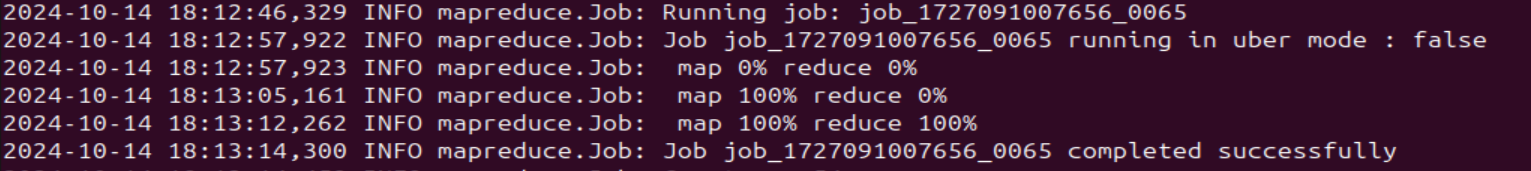

=> Spark need 1s | Hadoop need ~ 28s

Criterion | Spark     | Hadoop Mapreduce
----------|-----------|-----------------
Code      | Shorter   | Longer
Time      | Faster    | Slower

